In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import and read data

In [2]:
games_sales='https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/edit#gid=1485085913'
games_sales_trf=games_sales.replace('/edit#gid=','/export?format=csv&gid=')
print(games_sales_trf)

https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/export?format=csv&gid=1485085913


In [3]:
df=pd.read_csv(games_sales_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [5]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

#Clean data

##Check any rows with NaN

In [6]:
df_NaN=df[df.isna().any(axis=1)]
df_NaN.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
10,Fall Guys,10.0,NaN,8/1/2020,Battle royale,Mediatonic,Devolver Digital
13,Rust,9.0,NaN,2/1/2018,Survival,Facepunch Studios,Facepunch Studios


In [7]:
df_NaN.shape

(36, 7)

##drop rows with NaN

In [13]:
df_wo_NaN=df.dropna()
df_wo_NaN.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,11/1/2004,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,11/1/2004,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,5/1/2015,Action role-playing,CD Projekt Red,CD Projekt


In [14]:
df_wo_NaN.shape

(141, 7)

##change type data of 'Release'

In [15]:
df_wo_NaN['Release']=pd.to_datetime(df_wo_NaN['Release'])
print(df_wo_NaN.info())
df_wo_NaN.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       141 non-null    object        
 1   Sales      141 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    141 non-null    datetime64[ns]
 4   Genre      141 non-null    object        
 5   Developer  141 non-null    object        
 6   Publisher  141 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.8+ KB
None


<ipython-input-15-44d19c112ee8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_NaN['Release']=pd.to_datetime(df_wo_NaN['Release'])


,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt


#question

## 1. which game is the oldest and the newest games in that dataset?

In [17]:
question_1=df_wo_NaN.groupby('Release',as_index=False)['Name'].sum()
question_1

,Release,Name
0,1984-12-01,Hydlide
1,1985-06-01,Where in the World Is Carmen Sandiego?
2,1985-11-01,International Karate
3,1988-01-01,Tetris
4,1988-08-01,Last Ninja 2
...,...,...
100,2016-04-01,Dark Souls IIIDanganronpa 2: Goodbye Despair
101,2016-06-01,7 Days to DieHearts of Iron IV
102,2017-03-01,Nier: Automata
103,2017-09-01,Divinity: Original Sin II


from output above, we know that Hydlide is the oldest game has to release and Crusader Kings III is the newest game's

##2. which publisher published most of games?

Electronic Arts            19
Blizzard Entertainment     10
Activision                  6
GT Interactive              5
Paradox Interactive         4
Microsoft                   4
Capcom                      4
Gathering of Developers     4
THQ                         3
Ubisoft                     2
Name: Publisher, dtype: int64


[Text(0, 0, '19'),
 Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

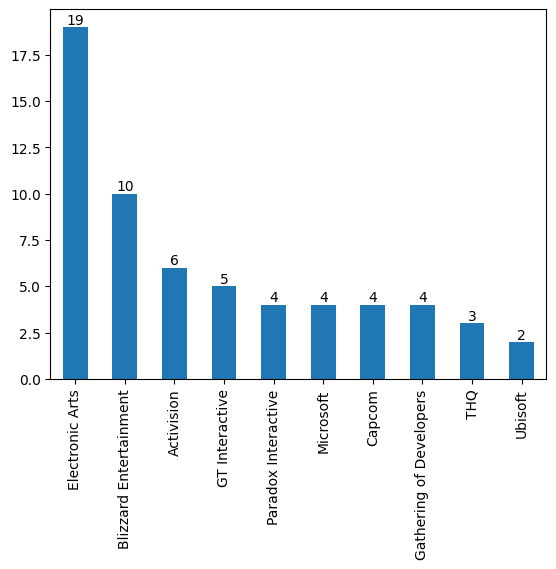

In [18]:
question_2=(df_wo_NaN['Publisher'].value_counts()).iloc[:10]
print(question_2)

bar=question_2.plot(kind='bar')
bar.bar_label(bar.containers[0],label_type='edge')

From the bar chart, we know that Electronic Arts is the most publisher published games. it has 19 games

##3. which developer most of the games?

Blizzard Entertainment        10
Maxis                          6
Valve                          4
Paradox Development Studio     4
id Software                    4
Capcom                         4
Ensemble Studios               4
Impressions Game               3
FromSoftware                   3
CD Projekt Red                 3
Name: Developer, dtype: int64


[Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

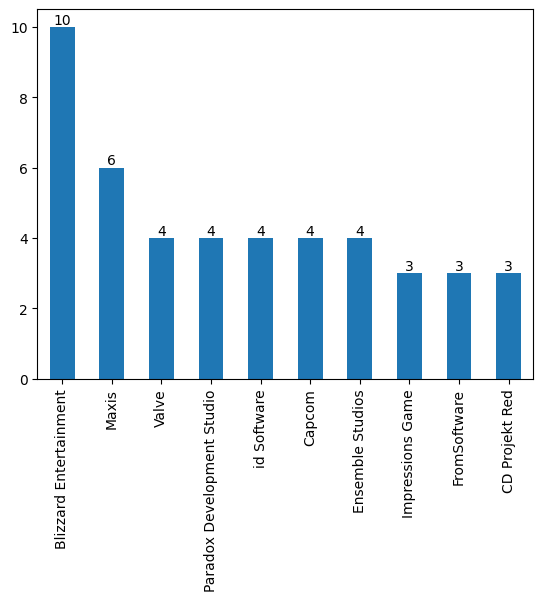

In [19]:
question_3=(df_wo_NaN['Developer'].value_counts()).iloc[:10]
print(question_3)

bar=question_3.plot(kind='bar')
bar.bar_label(bar.containers[0],label_type='edge')

From the bar chart, we know that Blizzard Entertainment is the developer who makes the most games. it has 10 games

##4. which series has the most sales

In [30]:
question_4=df_wo_NaN.groupby(['Series'])['Sales'].sum().reset_index()
question_4

#we have coloumns that we wants for plotting but dont have accsess to shorting coloumn we have
#reset_index is to keep same coloumns but removw the "level" of the group
#source : https://python.plainenglish.io/making-plots-with-the-pandas-groupby-ac492941af28

,Series,Sales
0,7 Days,2.0
1,ARMA,5.5
2,Age of Empires,8.0
3,Alice,1.0
4,Anno,4.0
...,...,...
86,Warhammer,5.0
87,Wing Commander,1.0
88,Wolfenstein,1.0
89,Zoo Tycoon,1.0


In [47]:
#sorting the top 10 of Series
sorting=question_4.sort_values(['Sales'],ascending=False).head(10)
sorting

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
68,StarCraft,21.0
85,Warcraft,19.0
76,The Witcher,16.0
61,RollerCoaster Tycoon,14.0
12,Civilization,14.0
35,Guild Wars,11.0


[Text(0, 0, '33.0'),
 Text(0, 0, '26.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '19.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '11.0')]

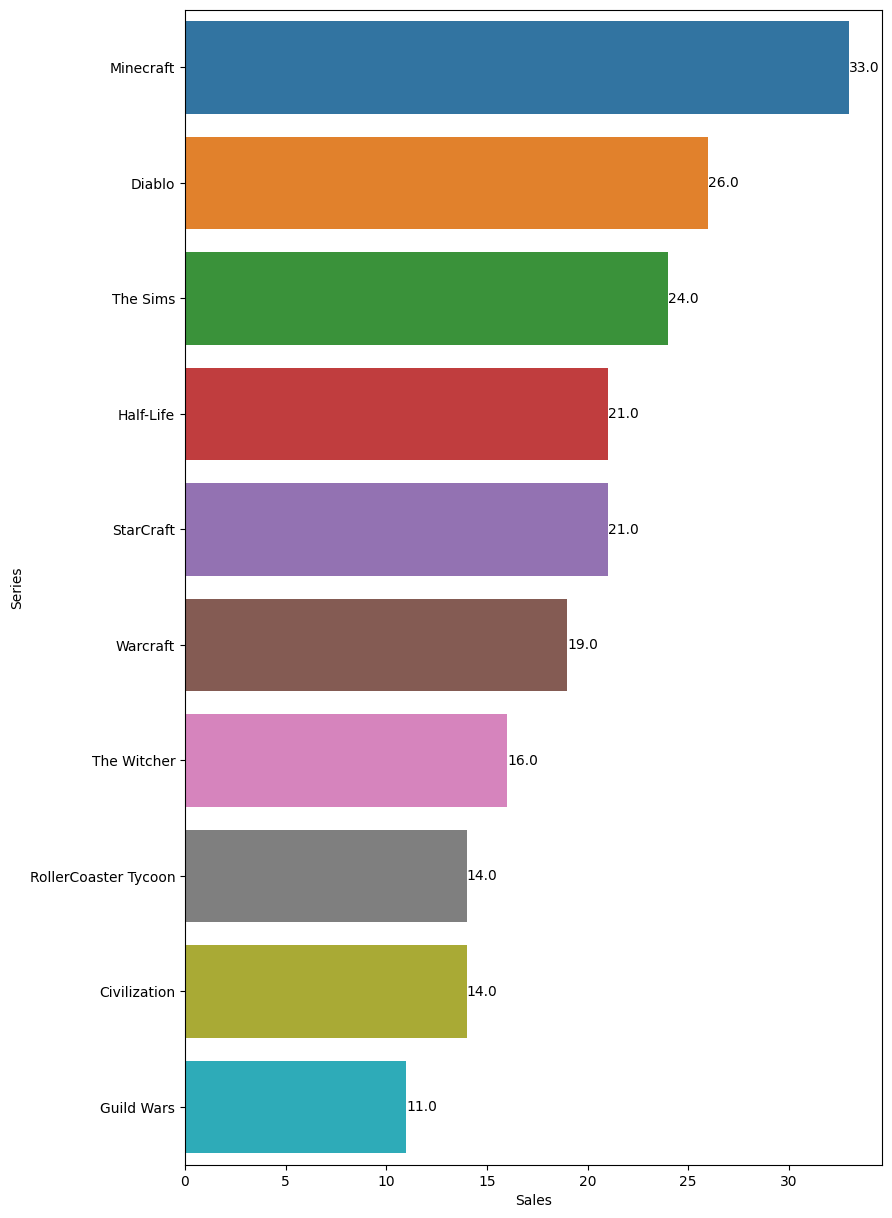

In [60]:
#plot
plt.rcParams["figure.figsize"] = (9,15)
plot=sns.barplot(x='Sales',y='Series',data=sorting)
plot.bar_label(plot.containers[0],labels=sorting['Sales'])

from above we know that, Minecraft is series the most sales.

##5. Which series have the most games?

StarCraft            6
Command & Conquer    5
Civilization         4
Age of Empires       4
Warcraft             3
The Witcher          3
The Sims             3
Diablo               3
Dark Souls           3
Resident Evil        3
Name: Series, dtype: int64


[Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

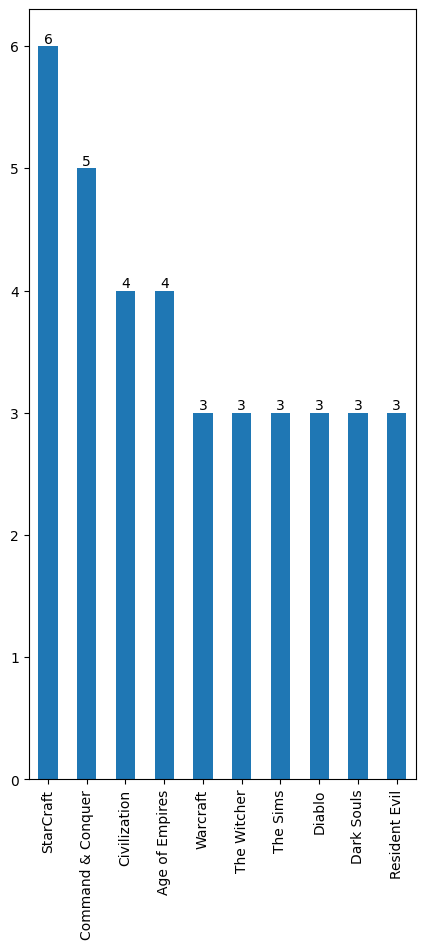

In [65]:
question_5=(df_wo_NaN['Series'].value_counts()).iloc[:10]
print(question_5)

plt.rcParams["figure.figsize"] = (5,10)
bar=question_5.plot(kind='bar')
bar.bar_label(bar.containers[0],label_type='edge')

From this output, we can conclude StarCraft is series the most games.